In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scalarhadronizer import ScalarHadronizer
from particle import Particle as p
#using the hipsofcobra code to generate pi+pi- and K+K- decay widths, see https://arxiv.org/pdf/2407.13587
from hipsofcobra import HipsofCobra

# pi and K decay widths from literature

In [3]:
#hips_pi = HipsofCobra( clist=[1,1,1], Pname='pi', method='DGL')
#hips_pi.write_widths()
pi_data=np.loadtxt('/home/henry/Documents/Uni/Masterarbeit/code/owndecayer/results/clist=[1, 1, 1]/widths_data_c=[1, 1, 1]_pi_method=DGL.csv',delimiter=',',skiprows=1)
m=pi_data[:,0]
gamma_pi_central=pi_data[:,1][m==2.0][0]
gamma_pi_lower=pi_data[:,2][m==2.0][0]
gamma_pi_upper=pi_data[:,3][m==2.0][0]
pi_width_2GeV=gamma_pi_central
print(pi_width_2GeV)

5.008185005808889e-08


In [4]:
#hips_K = HipsofCobra( clist=[1,1,1], Pname='K', method='DGL')
#hips_K.write_widths()
K_data=np.loadtxt('/home/henry/Documents/Uni/Masterarbeit/code/owndecayer/results/clist=[1, 1, 1]/widths_data_c=[1, 1, 1]_K_method=DGL.csv',delimiter=',',skiprows=1)
m=K_data[:,0]
gamma_K_central=K_data[:,1][m==2.0][0]
gamma_K_lower=K_data[:,2][m==2.0][0]
gamma_K_upper=K_data[:,3][m==2.0][0]
K_width_2GeV=gamma_K_central

print(K_width_2GeV)

1.310270241863413e-07


In [5]:
#from own calculation of gluonic decay width
#hadronic_decay_width_2GeV=1.5294102825483557e-07

gamma_tot_central=1.5294102825483557e-07
gamma_tot_lower=8.402010413558565e-08
gamma_tot_upper=3.8896142800792654e-07
hadronic_decay_width_2GeV=gamma_tot_central
pi_branching_ratio=pi_width_2GeV/hadronic_decay_width_2GeV
print(f'Pi branching ratio: {pi_branching_ratio}')
K_branching_ratio=K_width_2GeV/hadronic_decay_width_2GeV
print(f'K branching ratio: {K_branching_ratio}')
print(f'Sum: {pi_branching_ratio+K_branching_ratio}')

Pi branching ratio: 0.3274585677208917
K branching ratio: 0.8567159883874953
Sum: 1.184174556108387


In [5]:
gamma_tot_NNLO_central=2.48023368e-07
gamma_tot_NNLO_lower=1.44417714e-07
gamma_tot_NNLO_upper=5.13730053e-07

In [7]:
gamma_K_central_last=K_data[-1,1]
gamma_K_lower_last=K_data[-1,2]
gamma_K_upper_last=K_data[-1,3]
gamma_pi_central_last=pi_data[-1,1]
gamma_pi_lower_last=pi_data[-1,2]
gamma_pi_upper_last=pi_data[-1,3]

In [7]:
print(gamma_pi_central-gamma_pi_lower,gamma_pi_central-gamma_pi_upper)

1.6994107378125742e-08 -2.0503547775092997e-08


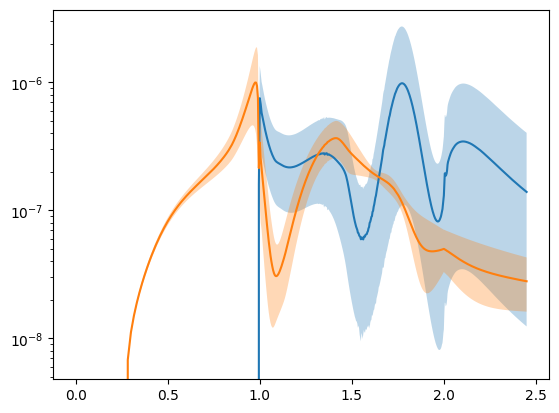

In [8]:
plt.plot(K_data[:,0],K_data[:,1])
plt.fill_between(K_data[:,0], K_data[:,2],K_data[:,3],alpha=0.3,interpolate=True)
plt.plot(pi_data[:,0],pi_data[:,1])
plt.fill_between(pi_data[:,0], pi_data[:,2],pi_data[:,3],alpha=0.3,interpolate=True)
plt.yscale('log')

# Ratio of down and strange weight from data
$\Gamma_\pi/\Gamma_K = \frac{2p(\pi)w_d}{3p(K)w_s}$
so $w_d/w_s$ is:

In [5]:
def p_restframe(M,m1,m2):
    return np.sqrt((M**2-(m1+m2)**2)*(M**2-(m1-m2)**2))/2/M

K=p.findall('K+')[0]
pi=p.findall('pi0')[0]
K.mass
print(3*p_restframe(2000,K.mass,K.mass)*pi_width_2GeV/(2*p_restframe(2000,pi.mass,pi.mass)*K_width_2GeV))

0.503205697784993


# Scalar resonances?

In [94]:
scalar_resonances=p.findall(lambda p: p.J==0 and p.C==1 and p.P==1)# and p.I==0)
for s in scalar_resonances:
    print(s.name,s.mass,s.J)
    dec=SH.single_particle_decays(s.pdgid)
    if (-211,211) in dec:
        print(f'\t pi+pi- br: {dec[(-211,211)]}')
    if (211,-211) in dec:
        print(f'\t pi+pi- br: {dec[(211,-211)]}')

    if (-321,321) in dec:
        print(f'\t K+K- br: {dec[(-321,321)]}')
    if (321,-321) in dec:
        print(f'\t K+K- br: {dec[(321,-321)]}')


a(0)(1450)0 1439.0 0.0
f(0)(1370) 1350.0 0.0
	 pi+pi- br: 0.5200000000000001
	 K+K- br: 0.03500000000000001
f(0)(1710) 1733.0 0.0
chi(c0)(1P) 3414.71 0.0
chi(b0)(1P) 9859.4 0.0
chi(b0)(2P) 10232.5 0.0
a(0)(980)0 980.0 0.0
	 K+K- br: 0.05
f(0)(500) 600.0 0.0
f(0)(980) 990.0 0.0
	 pi+pi- br: 0.6667
f(0)(1500) 1522.0 0.0
	 pi+pi- br: 0.23300000000000004
	 K+K- br: 0.043000000000000003
f(0)(2020) 1982.0 0.0


Since the widths of f(1370) and f(1500) are not very big (from pdg) they shouldnt affect the pi+pi- or K+K- brs too much, so its probably unnecessary to implement resonances in the model. Note: pdg doesn't list the branching ratios above for f(1370)

In [9]:
0.5*np.cos(np.arctan(1/np.sqrt(2)))**2

np.float64(0.3333333333333333)

Identify singlets and octets to assign mixing angles

In [27]:
p.findall(lambda p: p.J==0 and p.P==-1 and p.invert()==p and p.L==0)

[<Particle: name="pi0", pdgid=111, mass=134.9768 ± 0.0005 MeV>,
 <Particle: name="K(L)0", pdgid=130, mass=497.611 ± 0.013 MeV>,
 <Particle: name="eta", pdgid=221, mass=547.862 ± 0.017 MeV>,
 <Particle: name="K(S)0", pdgid=310, mass=497.611 ± 0.013 MeV>,
 <Particle: name="eta'(958)", pdgid=331, mass=957.78 ± 0.06 MeV>,
 <Particle: name="eta(c)(1S)", pdgid=441, mass=2984.1 ± 0.4 MeV>,
 <Particle: name="eta(b)(1S)", pdgid=551, mass=9398.7 ± 2.0 MeV>,
 <Particle: name="pi(1300)0", pdgid=100111, mass=1300 ± 100 MeV>,
 <Particle: name="eta(1295)", pdgid=100221, mass=1294 ± 4 MeV>,
 <Particle: name="eta(1475)", pdgid=100331, mass=1476 ± 4 MeV>,
 <Particle: name="eta(c)(2S)", pdgid=100441, mass=3637.7 ± 0.9 MeV>]

In [112]:
mixed_mesons=p.findall(lambda p: p.invert()==p and ('+' in p.quarks or '-' in p.quarks))
for m in mixed_mesons:
    print(m.name,m.quarks)

pi0 (uU-dD)/sqrt(2)
rho(770)0 (uU-dD)/sqrt(2)
a(2)(1320)0 (uU-dD)/sqrt(2)
rho(3)(1690)0 (uU-dD)/sqrt(2)
a(4)(1970)0 (uU-dD)/sqrt(2)
K(L)0 p(dS)-q(Ds)
eta x(uU+dD)+y(sS)
omega(782) x(uU+dD)+y(sS)
f(2)(1270) x(uU+dD)+y(sS)
omega(3)(1670) x(uU+dD)+y(sS)
f(4)(2050) x(uU+dD)+y(sS)
K(S)0 p(dS)+q(Ds)
eta'(958) x(uU+dD)+y(sS)
phi(1020) x(uU+dD)+y(sS)
f(2)'(1525) x(uU+dD)+y(sS)
phi(3)(1850) x(uU+dD)+y(sS)
a(0)(1450)0 (uU-dD)/sqrt(2)
b(1)(1235)0 (uU-dD)/sqrt(2)
pi(2)(1670)0 (uU-dD)/sqrt(2)
f(0)(1370) x(uU+dD)+y(sS)
h(1)(1170) x(uU+dD)+y(sS)
eta(2)(1645) x(uU+dD)+y(sS)
f(0)(1710) x(uU+dD)+y(sS)
h(1)(1415) x(uU+dD)+y(sS)
eta(2)(1870) x(uU+dD)+y(sS)
a(1)(1260)0 (uU-dD)/sqrt(2)
f(1)(1285) x(uU+dD)+y(sS)
f(1)(1420) x(uU+dD)+y(sS)
rho(1700)0 (uU-dD)/sqrt(2)
omega(1650) x(uU+dD)+y(sS)
pi(1300)0 (uU-dD)/sqrt(2)
rho(1450)0 (uU-dD)/sqrt(2)
eta(1295) x(uU+dD)+y(sS)
omega(1420) x(uU+dD)+y(sS)
eta(1475) x(uU+dD)+y(sS)
phi(1680) x(uU+dD)+y(sS)
a(0)(980)0 Maybe non-qQ
pi(1)(1400)0 Maybe non-qQ
a(2)(1700)0 (uU-

array([-0.30224296])

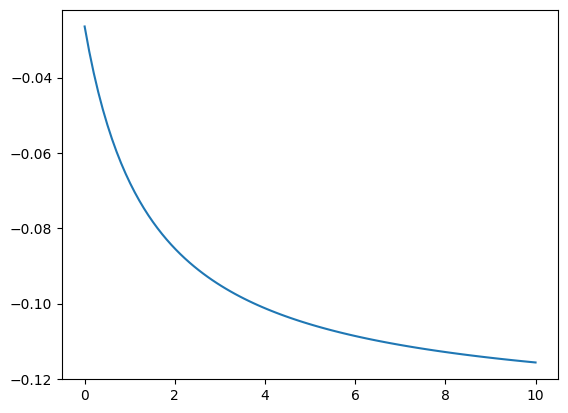

In [22]:
def gamma_pi(ws):
    iw=update_init_weights(SH,meson_pairs,1.5,ws)
    return iw[(-211,211)]+iw[(111,111)]-pi_branching_ratio

x=np.linspace(0,10,100)
plt.plot(x,gamma_pi(x))
optimize.fsolve(gamma_pi,1)

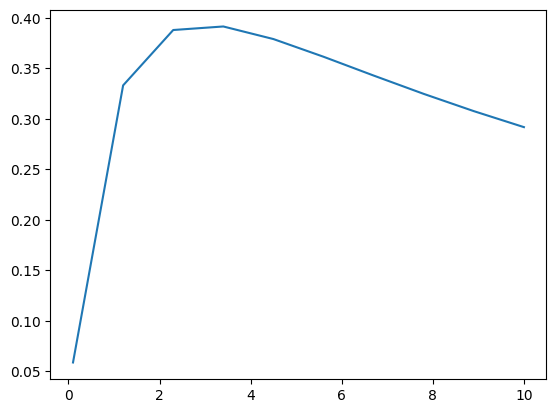

In [105]:
def K_bound(ws,OAM_supression_par):
    SH=ScalarHadronizer(2000,OAM_supression_par=OAM_supression_par,up_weight=1,down_weight=1,strange_weight=ws)
    pairs=SH.make_initialMesonPairs(exclude_below_threshold=False)
    sum=0
    for pair in pairs:
        p1=p.from_pdgid(pair[0])
        p2=p.from_pdgid(pair[1])
        if p1.J==0 and p2.J==0 and not pair in [(-321,321),(-311,311)]:
            sum+=pairs[pair]
    return 1/(1+sum/(pairs[(-321,321)]+pairs[(-311,311)]))

K_bounds=[]
x_range=np.linspace(0.1,10,10)
for x in x_range:
    K_bounds.append(K_bound(x,0.1))
plt.plot(x_range,K_bounds)


# Likelihood fit (with fitted pdfs)


In [7]:
import scipy.optimize as optimize
SH1=ScalarHadronizer(2000,1,1,1,1,1,1)

def init_make_initialMesonPairs(self):
    mesons_below_threshold=p.findall(lambda p: p.mass<2000 and p.pdgid.is_meson==True)
    meson_pairs={}
    total_weight=0
    for i,m1 in enumerate(mesons_below_threshold):
        for m2 in mesons_below_threshold[i:]:
            if self.check_meson_combinations(m1,m2,self.scalar_mass):
                weight=self.initialWeight(m1,m2,1,1,1,1,1,1)
                if m1.pdgid<m2.pdgid: meson_pairs[(m1,m2)]=weight
                else: meson_pairs[(m2,m1)]=weight
                total_weight+=weight
    meson_pairs={k:v/total_weight for k,v in meson_pairs.items()}
    return meson_pairs

def update_init_weights(self,init_meson_pairs,strange_weight,OAM_supression_par):
    meson_pairs={}
    total_weight=0
    for m1,m2 in init_meson_pairs:
            weight=self.initialWeight(m1,m2,1,1,strange_weight,0,0,OAM_supression_par)
            if m1.pdgid<m2.pdgid: meson_pairs[(int(m1.pdgid),int(m2.pdgid))]=weight
            else: meson_pairs[(int(m2.pdgid),int(m1.pdgid))]=weight
            total_weight+=weight
    meson_pairs={k:v/total_weight for k,v in meson_pairs.items()}
    return meson_pairs

meson_pairs=init_make_initialMesonPairs(SH1)

def p_restframe(M,m1,m2):
    return np.sqrt((M**2-(m1+m2)**2)*(M**2-(m1-m2)**2))/2/M

K_p=p.findall('K+')[0]
K0=p.findall('K0')[0]
pi0=p.findall('pi0')[0]
pi_p=p.findall('pi+')[0]

def strange_weight(gamma_pi,gamma_K):
    return gamma_K*(p_restframe(2000,pi0.mass,pi0.mass)+2*p_restframe(2000,pi_p.mass,pi_p.mass))/(3*gamma_pi*(p_restframe(2000,K0.mass,K0.mass)+p_restframe(2000,K_p.mass,K_p.mass)))

def pi_K_brs_2GeV(ws,wv):
    pairs=update_init_weights(SH1,meson_pairs,ws,wv)
    br_pi=pairs[(-211,211)]+pairs[(111,111)]
    br_K=pairs[(-321,321)]+pairs[(-311,311)]
    return br_pi,br_K


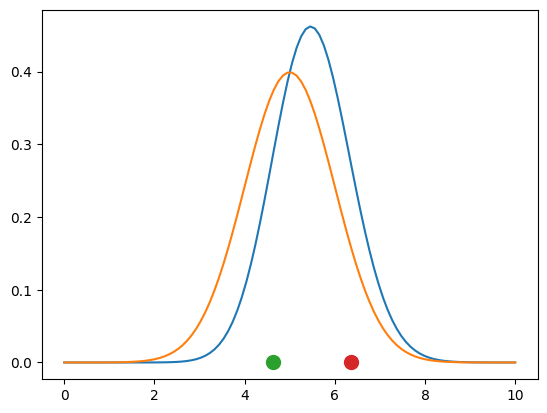

In [8]:
from scipy.stats import skewnorm,norm
x=np.linspace(0,10,100)
xi=5
alpha=0.8
omega=1
plt.plot(x,skewnorm.pdf(x,alpha,loc=xi,scale=omega))
plt.plot(x,norm.pdf(x,loc=xi))
p1=skewnorm.ppf(0.16,alpha,loc=xi,scale=omega)
p2=skewnorm.ppf(0.84,alpha,loc=xi,scale=omega)
plt.plot(p1,0,'o',markersize=10)
plt.plot(p2,0,'o',markersize=10)

In [9]:
def fit_skewnorm(x,scaling=1):
    loc=x[0]
    scale=x[1]
    skew=x[2]
    mean=skewnorm.mean(skew,loc=loc,scale=scale)
    median=skewnorm.median(skew,loc=loc,scale=scale)
    return [skewnorm.cdf(gamma_pi_lower*scaling,skew,loc=loc,scale=scale)-0.16,skewnorm.cdf(gamma_pi_upper*scaling,skew,loc=loc,scale=scale)-0.84,median-gamma_pi_central*scaling]

     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [ 9.577e-11 -1.332e-10  4.904e-11]
           x: [ 4.378e+00  1.041e+00  1.332e+00]
        cost: 1.4660893626010036e-20
         jac: [[-3.867e-02  3.975e-02 -2.652e-02]
               [-2.779e-02 -7.157e-02 -1.159e-05]
               [ 1.000e+00  6.053e-01  1.369e-01]]
        grad: [ 4.904e-11  4.303e-11  4.177e-12]
  optimality: 4.903904632747108e-11
 active_mask: [ 0.000e+00  0.000e+00  0.000e+00]
        nfev: 9
        njev: 8
0.2852381953741676
0.17353078237537667


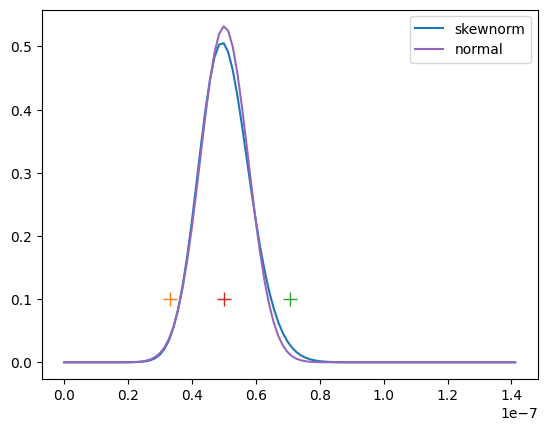

In [10]:
from scipy import optimize
from scipy.stats import skewnorm,norm
def fit_skewnorm_pi(x,scaling=1):
    loc=x[0]
    scale=x[1]
    skew=x[2]
    mean=skewnorm.mean(skew,loc=loc,scale=scale)
    median=skewnorm.median(skew,loc=loc,scale=scale)
    return [skewnorm.cdf(gamma_pi_lower*scaling,skew,loc=loc,scale=scale)-0.01,skewnorm.cdf(gamma_pi_upper*scaling,skew,loc=loc,scale=scale)-0.99,median-gamma_pi_central*scaling]

scaling=1e8
res=optimize.least_squares(fit_skewnorm_pi,x0=(1,1,0),args=(scaling,))
print(res)
x=np.linspace(0,gamma_pi_upper*2,100)
plt.plot(x,skewnorm.pdf(scaling*x,res.x[2],loc=res.x[0],scale=res.x[1]),label='skewnorm')
plt.plot(gamma_pi_lower,0.1,'+',markersize=10)
plt.plot(gamma_pi_upper,0.1,'+',markersize=10)
plt.plot(gamma_pi_central,0.1,'+',markersize=10)

plt.plot(x,1/scaling*norm.pdf(x,loc=gamma_pi_central,scale=(gamma_pi_upper-gamma_pi_lower)/5),label='normal')
plt.legend()
print(abs(1-skewnorm.ppf(0.16,res.x[2],loc=res.x[0],scale=res.x[1])/gamma_pi_lower*1e-8))
print(abs(1-skewnorm.ppf(0.84,res.x[2],loc=res.x[0],scale=res.x[1])/gamma_pi_upper*1e-8))

     message: The maximum number of function evaluations is exceeded.
     success: False
      status: 0
         fun: [-9.808e-03  5.588e-03 -1.234e-03]
           x: [ 3.196e+00  4.427e+00]
        cost: 6.446996196525358e-05
         jac: [[-2.485e-04 -5.014e-04]
               [-1.206e-02 -5.306e-03]
               [ 4.099e+00  3.193e+00]]
        grad: [-5.122e-03 -3.964e-03]
  optimality: 0.18063195613521632
 active_mask: [0 0]
        nfev: 200
        njev: 150
2.332039609392891
0.17865059512638826


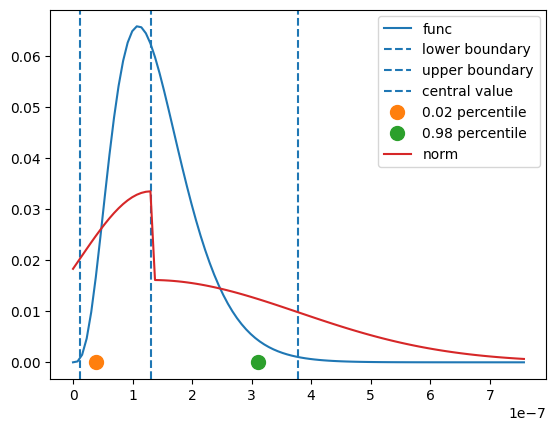

In [11]:
from scipy.stats import gamma,chi
def fit_func_K(x,scaling=1,func=gamma):
    #loc=x[0]
    scale=x[0]
    skew=x[1]
    #loc=x[2]
    loc=0
    mean=func.mean(skew,loc=loc,scale=scale)
    median=func.median(skew,loc=loc,scale=scale)
    return [func.cdf(gamma_K_lower*scaling,skew,loc=loc,scale=scale)-0.01,func.cdf(gamma_K_upper*scaling,skew,loc=loc,scale=scale)-0.99,median-gamma_K_central*scaling]

def fit_gamma_K2(x,scaling=1):
    loc=0
    scale=x[0]
    skew=x[1]
    median=gamma.median(skew,loc=loc,scale=scale)
    mean=func.mean(skew,loc=loc,scale=scale)
    return mean-gamma_K_central*scaling
scaling=1e8
func=gamma
#res_K=optimize.least_squares(fit_func_K,x0=(0,1,1),args=(scaling,),bounds=([0,0,0],[np.inf,np.inf,50]))
res_K=optimize.least_squares(fit_func_K,x0=(1,1),args=(scaling,),bounds=([0,0],[np.inf,50]))
#res_K=optimize.least_squares(fit_gamma_K2,x0=(1,1),args=(scaling,),bounds=([1,0],[50,np.inf]))
print(res_K)
if len(res_K.x)<3: loc=0
else: loc=res_K.x[2]
x=np.linspace(0,gamma_K_upper*2,100)
plt.plot(x,func.pdf(scaling*x,res_K.x[1],loc=loc,scale=res_K.x[0]),label='func')
plt.axvline(gamma_K_lower,linestyle='--',label='lower boundary')
plt.axvline(gamma_K_upper,linestyle='--',label='upper boundary')
plt.axvline(gamma_K_central,linestyle='--',label='central value')
plt.plot(func.ppf(0.02,res_K.x[1],loc=loc,scale=res_K.x[0])/scaling,0,'o',markersize=10,label='0.02 percentile')
plt.plot(func.ppf(0.98,res_K.x[1],loc=loc,scale=res_K.x[0])/scaling,0,'o',markersize=10,label='0.98 percentile')
#plt.plot(x,1/scaling*norm.pdf(x,loc=gamma_K_central,scale=(gamma_K_upper-gamma_K_lower)/4),label='norm')
plt.plot(x,1/scaling*np.where(x<gamma_K_central,norm.pdf(x,loc=gamma_K_central,scale=gamma_K_central-gamma_K_lower),norm.pdf(x,loc=gamma_K_central,scale=gamma_K_upper-gamma_K_central)),label='norm')
plt.legend()
#plt.xscale('log')
print(abs(1-func.ppf(0.02,res_K.x[1],loc=loc,scale=res_K.x[0])/gamma_K_lower*1e-8))
print(abs(1-func.ppf(0.98,res_K.x[1],loc=loc,scale=res_K.x[0])/gamma_K_upper*1e-8))


     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [-1.041e-17  0.000e+00 -1.776e-15]
           x: [ 6.317e+00  1.501e+00  7.817e+00]
        cost: 1.5777759772217095e-30
         jac: [[-4.577e-03 -6.197e-02 -4.946e-02]
               [-1.424e-02 -3.482e-02 -2.895e-03]
               [ 1.184e+00  6.236e+00  1.000e+00]]
        grad: [-2.102e-15 -1.108e-14 -1.776e-15]
  optimality: 1.1077078451091316e-14
 active_mask: [0 0 0]
        nfev: 31
        njev: 23
0.6369866978266174
0.4212045467826073


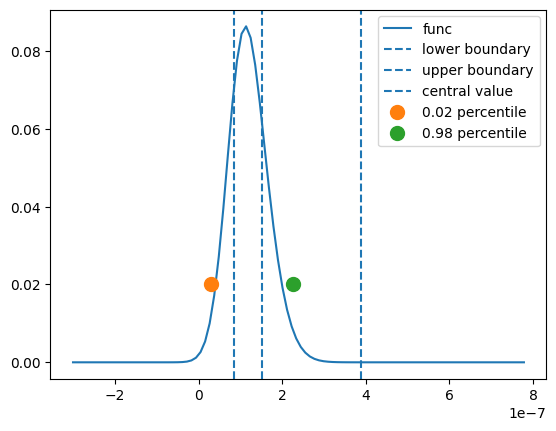

In [12]:
from scipy.stats import gamma,chi2,chi
def fit_func_gamma_tot(x,scaling=1,func=gamma):
    loc=x[2]
    scale=x[0]
    skew=x[1]
    mean=func.mean(skew,loc=loc,scale=scale)
    median=func.median(skew,loc=loc,scale=scale)
    return [func.cdf(gamma_tot_lower*scaling,skew,loc=loc,scale=scale)-0.02,func.cdf(gamma_tot_upper*scaling,skew,loc=loc,scale=scale)-0.98,median-gamma_tot_central*scaling]

scaling=1e8
func=skewnorm
#res_gamma=optimize.least_squares(fit_func_gamma_tot,x0=(1,1),args=(scaling,),bounds=([0,0],[np.inf,50]))
res_gamma=optimize.least_squares(fit_func_gamma_tot,x0=(1,1,0),args=(scaling,),bounds=([0,0,0],[np.inf,np.inf,np.inf]))
print(res_gamma)
if len(res_gamma.x)<3: loc=0
else: loc=res_gamma.x[2]
x=np.linspace(-3e-7,gamma_tot_upper*2,100)
plt.plot(x,func.pdf(scaling*x,res_gamma.x[1],loc=loc,scale=res_gamma.x[0]),label='func')
plt.axvline(gamma_tot_lower,linestyle='--',label='lower boundary')
plt.axvline(gamma_tot_upper,linestyle='--',label='upper boundary')
plt.axvline(gamma_tot_central,linestyle='--',label='central value')
plt.plot(func.ppf(0.02,res_gamma.x[1],loc=loc,scale=res_gamma.x[0])/scaling,0.02,'o',markersize=10,label='0.02 percentile')
plt.plot(func.ppf(0.98,res_gamma.x[1],loc=loc,scale=res_gamma.x[0])/scaling,0.02,'o',markersize=10,label='0.98 percentile')


#plt.plot(x,1/scaling*norm.pdf(x,loc=gamma_tot_central,scale=(gamma_tot_upper-gamma_tot_lower)/2),label='norm')
plt.legend()
print(abs(1-func.ppf(0.02,res_gamma.x[1],loc=loc,scale=res_gamma.x[0])/gamma_tot_lower*1e-8))
print(abs(1-func.ppf(0.98,res_gamma.x[1],loc=loc,scale=res_gamma.x[0])/gamma_tot_upper*1e-8))

In [100]:
def nll(theta,mu_pi,sigma_pi,a_K,omega_K,a_tot,omega_tot):
    ws=theta[0]
    wv=theta[1]
    gamma_tot=theta[2]
    br_pi,br_K=pi_K_brs_2GeV(ws,wv)
    gamma_pi=br_pi*gamma_tot
    gamma_K=br_K*gamma_tot
    scaling=1e8
    return (gamma_pi-mu_pi)**2/(2*sigma_pi**2) - (a_K-1)*np.log(gamma_K/omega_K) - (a_tot-1)*np.log(gamma_tot/omega_tot) + gamma_K/omega_K + gamma_tot/omega_tot

mu_pi=gamma_pi_central*scaling
sigma_pi=(gamma_pi_upper-gamma_pi_lower)/5*scaling
a_K=res_K.x[1]
omega_K=res_K.x[0]
a_tot=res_gamma.x[1]
omega_tot=res_gamma.x[0]

nll([1,0.2,gamma_tot_central],mu_pi,sigma_pi,a_K,omega_K,a_tot,omega_tot)

np.float64(358.0814395207578)

In [250]:
res_nll=optimize.minimize(nll,(1,0.2,gamma_tot_central*scaling),args=(mu_pi,sigma_pi,a_K,omega_K,a_tot,omega_tot),bounds=[(0,10),(0,1),(0,gamma_tot_upper*2*scaling)],method='Nelder-Mead')
ws_min=res_nll.x[0]
wv_min=res_nll.x[1]
gamma_tot_min=res_nll.x[2]/scaling
res_nll

/tmp/ipykernel_22419/1104610515.py:9: RuntimeWarning: divide by zero encountered in log
  return (gamma_pi-mu_pi)**2/(2*sigma_pi**2) - (a_K-1)*np.log(gamma_K/omega_K) - (a_tot-1)*np.log(gamma_tot/omega_tot) + gamma_K/omega_K + gamma_tot/omega_tot


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -31.35810968373024
             x: [ 5.310e-01  0.000e+00  1.944e+01]
           nit: 117
          nfev: 204
 final_simplex: (array([[ 5.310e-01,  0.000e+00,  1.944e+01],
                       [ 5.310e-01,  0.000e+00,  1.944e+01],
                       [ 5.310e-01,  0.000e+00,  1.944e+01],
                       [ 5.310e-01,  0.000e+00,  1.944e+01]]), array([-3.136e+01, -3.136e+01, -3.136e+01, -3.136e+01]))

In [194]:
print(res_nll.message)
print(f'L: {res_nll.fun}')
print(f'Parameters:')
print(f'\t ws: {res_nll.x[0]}')
print(f'\t wv: {res_nll.x[1]} ')
print(f'\t gamma_tot: {res_nll.x[2]/scaling}, distance to central value: {1-res_nll.x[2]/scaling/gamma_tot_central}')
print('resulting decay widths:')
br_pi,br_K=pi_K_brs_2GeV(res_nll.x[0],res_nll.x[1])
print(f'br_pi: {br_pi}, gamma_pi: {br_pi*res_nll.x[2]/scaling}, distrance to central value: {1-br_pi*res_nll.x[2]/scaling/gamma_pi_central}')
print(f'br_K: {br_K}, gamma_K: {br_K*res_nll.x[2]/scaling}, distrance to central value: {1-br_K*res_nll.x[2]/scaling/gamma_K_central}')
print(f'')

Optimization terminated successfully.
L: -31.35810968373024
Parameters:
	 ws: 0.5309985875301801
	 wv: 0.0 
	 gamma_tot: 1.9440276023265107e-07, distance to central value: -0.27109620257509026
resulting decay widths:
br_pi: 0.2354134771980641, gamma_pi: 4.5765029763269924e-08, distrance to central value: 0.08619530408345488
br_K: 0.22145190159419254, gamma_K: 4.305086092868045e-08, distrance to central value: 0.6714352539407804



/tmp/ipykernel_22419/1104610515.py:9: RuntimeWarning: divide by zero encountered in log
  return (gamma_pi-mu_pi)**2/(2*sigma_pi**2) - (a_K-1)*np.log(gamma_K/omega_K) - (a_tot-1)*np.log(gamma_tot/omega_tot) + gamma_K/omega_K + gamma_tot/omega_tot


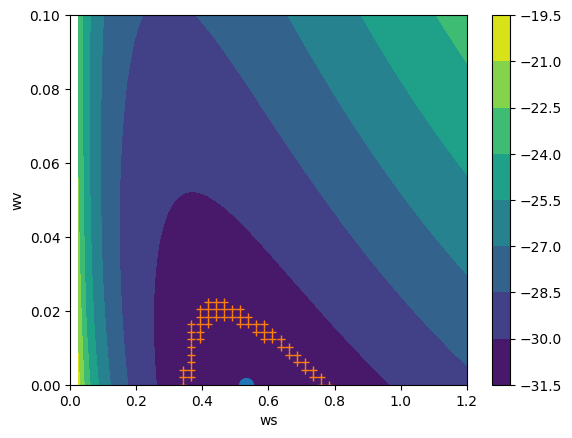

In [170]:
ws=np.linspace(0,1.2,50)
wv=np.linspace(0,0.1,50)
gamma_tot=np.linspace(0,gamma_tot_upper*2,50)
X,Y=np.meshgrid(ws,wv)
nll_const_gamma=np.vectorize(lambda x,y: nll([x,y,res_nll.x[2]],mu_pi,sigma_pi,a_K,omega_K,a_tot,omega_tot))(X,Y)
plt.contourf(X,Y,nll_const_gamma)
plt.colorbar()
plt.xlabel('ws')
plt.ylabel('wv')
plt.plot(res_nll.x[0],res_nll.x[1],'o',markersize=10)
mask=np.abs(nll_const_gamma-0.5-res_nll.fun)<8e-2
plt.plot(X[mask],Y[mask],'+')

/tmp/ipykernel_22419/1104610515.py:9: RuntimeWarning: divide by zero encountered in log
  return (gamma_pi-mu_pi)**2/(2*sigma_pi**2) - (a_K-1)*np.log(gamma_K/omega_K) - (a_tot-1)*np.log(gamma_tot/omega_tot) + gamma_K/omega_K + gamma_tot/omega_tot


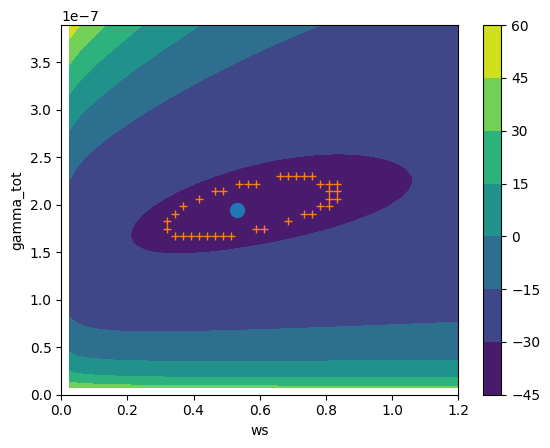

In [197]:
ws=np.linspace(0,1.2,50)
wv=np.linspace(0,0.1,50)
gamma_tot=np.linspace(0,gamma_tot_upper,50)
X,Y=np.meshgrid(ws,gamma_tot)
nll_const_wv=np.vectorize(lambda x,y: nll([x,res_nll.x[1],y*scaling],mu_pi,sigma_pi,a_K,omega_K,a_tot,omega_tot))(X,Y)
plt.contourf(X,Y,nll_const_wv)
plt.colorbar()
plt.xlabel('ws')
plt.ylabel('gamma_tot')
plt.plot(res_nll.x[0],res_nll.x[2]/scaling,'o',markersize=10)
mask=np.abs(nll_const_wv-0.5-res_nll.fun)<8e-2
plt.plot(X[mask],Y[mask],'+')

/tmp/ipykernel_22419/1104610515.py:9: RuntimeWarning: divide by zero encountered in log
  return (gamma_pi-mu_pi)**2/(2*sigma_pi**2) - (a_K-1)*np.log(gamma_K/omega_K) - (a_tot-1)*np.log(gamma_tot/omega_tot) + gamma_K/omega_K + gamma_tot/omega_tot


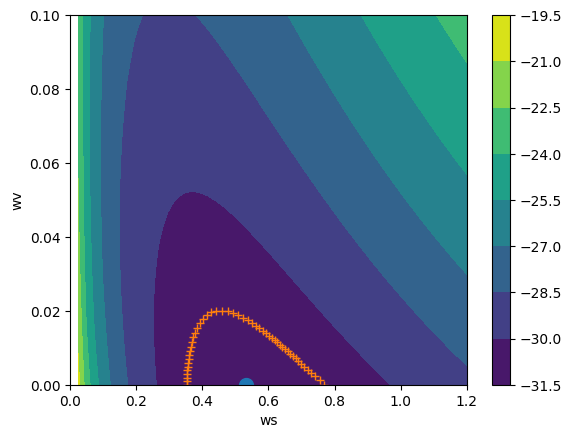

In [ ]:
ws_contour=[]
wv_contour=[]
for phi in np.linspace(0,np.pi,40):
    aspect_ratio=0.1/1.2
    root=optimize.root_scalar(lambda r: nll([r*np.cos(phi)+res_nll.x[0],(r*np.sin(phi)+res_nll.x[1])*aspect_ratio,res_nll.x[2]],mu_pi,sigma_pi,a_K,omega_K,a_tot,omega_tot)-res_nll.fun-0.5,bracket=[0,np.sqrt(res_nll.x[0]**2+res_nll.x[1]**2)])
    ws_contour.append(root.root*np.cos(phi)+res_nll.x[0])
    wv_contour.append((root.root*np.sin(phi)+res_nll.x[1])*aspect_ratio)


plt.contourf(X,Y,Z)
plt.colorbar()
plt.xlabel('ws')
plt.ylabel('wv')
plt.plot(res_nll.x[0],res_nll.x[1],'o',markersize=10)
plt.plot(ws_contour,wv_contour,'+')


-3.141592653589793 0.53099858753018
-3.0133643820146996 0.4031214258456741
-2.885136110439606 0.2773440036206729
-2.7569078388645125 0.15573158265080675
-2.628679567289419 0.04028103552625017
-2.500451295714325 0.5309985875301816
-2.3722230241392315 0.530998587530183
-2.243994752564138 0.5309985875301853
-2.1157664809890444 0.5309985875301885
-1.9875382094139509 0.5309985875301928
-1.8593099378388573 0.5309985875301984
-1.7310816662637636 0.5309985875302053
-1.60285339468867 0.5309985875302136
-1.4746251231135765 0.5309985875302229
-1.3463968515384828 0.5309985875302333
-1.2181685799633892 0.5309985875302445
-1.0899403083882957 0.5309985875302563
-0.9617120368132022 0.5309985875302682
-0.8334837652381086 0.5309985875302797
-0.7052554936630151 0.5309985875302905
-0.5770272220879216 0.5309985875303004
-0.4487989505128276 0.09711484841332516
-0.32057067893773405 0.21589036950689194
-0.19234240736264052 0.339839958829026
-0.06411413578754699 0.4669283675496286
0.06411413578754654 0.5950688

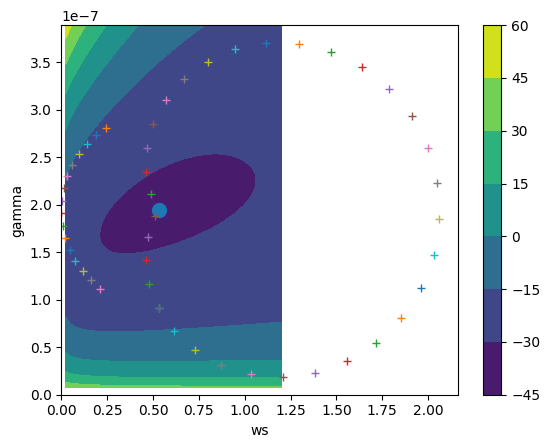

In [281]:
ws_list=[]
wv_list=[]
for phi in np.linspace(0,np.pi,50):
    aspect_ratio=gamma_tot_upper/1.2*scaling
    R=np.sqrt(ws**2+(gamma_tot_min)**2)
    ws=1*np.cos(phi)+ws_min
    gamma=(gamma_tot_upper*np.sin(phi)+gamma_tot_min)
    ws_list.append(ws)
    wv_list.append(gamma)

def get_upper_bound(theta,phi):
    vec=param_vec(1,theta,phi)
    return np.linalg.norm([np.where(vec[0]<0,ws_min,vec[0]),np.where(vec[1]<0,wv_min,vec[1]),np.where(vec[2]<0,gamma_tot_min,vec[2])])

def param_vec(r,theta,phi):
    ws=r*np.sin(theta)*np.cos(phi)+ws_min
    wv=0.1*r*np.sin(theta)*np.sin(phi)+wv_min
    gamma_tot=gamma_tot_min*r*np.cos(theta)+gamma_tot_min
    return np.array([ws,wv,gamma_tot])
theta=np.linspace(-np.pi,np.pi,50)
phi=np.linspace(0,np.pi,50)
theta_grid,phi_grid=np.meshgrid(theta,phi)
upper_bound=upper_bound_vec(theta_grid,phi_grid)
upper_bound=param_vec(1,theta_grid,phi_grid)

plt.contourf(X,Y,nll_const_wv)
plt.colorbar()
plt.xlabel('ws')
plt.ylabel('gamma')
plt.plot(ws_min,gamma_tot_min,'o',markersize=10)
#plt.plot(ws_list,wv_list,'+')
#plt.plot(upper_bound[0,phi_grid==0],upper_bound[2,phi_grid==0],'+')
for theta in np.linspace(-np.pi,np.pi,50):
    upper_bound=get_upper_bound(theta,0)
    print(theta,upper_bound)
    #upper_bound=1
    plt.plot(param_vec(upper_bound,theta,0)[0],param_vec(upper_bound,theta,0)[2],'+')

print(param_vec(1,-np.pi/2,0))
print(get_upper_bound(-np.pi/2,0))


In [272]:
for theta in np.linspace(-np.pi,np.pi,50):
    for phi in np.linspace(0,np.pi,50):
        upper_bound=get_upper_bound(theta,phi)
        root=optimize.root_scalar(lambda r: nll(param_vec(r,theta,phi),mu_pi,sigma_pi,a_K,omega_K,a_tot,omega_tot)-res_nll.fun-0.5,bracket=[0,upper_bound])
        

ValueError: f(a) and f(b) must have different signs

In [158]:
from scipy.interpolate import CubicSpline
interpolation = CubicSpline(ws_contour, wv_contour)
plt.contourf(X,Y,Z)
plt.colorbar()
plt.xlabel('ws')
plt.ylabel('wv')
plt.plot(res_nll.x[0],res_nll.x[1],'o',markersize=10)
plt.plot(ws_contour,interpolation(ws_contour))

ValueError: `x` must be strictly increasing sequence.

In [42]:
import scipy.optimize as optimize
SH1=ScalarHadronizer(2000,1,1,1,1,1,1)

def init_make_initialMesonPairs(self):
    mesons_below_threshold=p.findall(lambda p: p.mass<2000 and p.pdgid.is_meson==True)
    meson_pairs={}
    total_weight=0
    for i,m1 in enumerate(mesons_below_threshold):
        for m2 in mesons_below_threshold[i:]:
            if self.check_meson_combinations(m1,m2,self.scalar_mass):
                weight=self.initialWeight(m1,m2,1,1,1,1,1,1)
                if m1.pdgid<m2.pdgid: meson_pairs[(m1,m2)]=weight
                else: meson_pairs[(m2,m1)]=weight
                total_weight+=weight
    meson_pairs={k:v/total_weight for k,v in meson_pairs.items()}
    return meson_pairs

def update_init_weights(self,init_meson_pairs,strange_weight,OAM_supression_par):
    meson_pairs={}
    total_weight=0
    for m1,m2 in init_meson_pairs:
            weight=self.initialWeight(m1,m2,1,1,strange_weight,0,0,OAM_supression_par)
            if m1.pdgid<m2.pdgid: meson_pairs[(int(m1.pdgid),int(m2.pdgid))]=weight
            else: meson_pairs[(int(m2.pdgid),int(m1.pdgid))]=weight
            total_weight+=weight
    meson_pairs={k:v/total_weight for k,v in meson_pairs.items()}
    return meson_pairs

meson_pairs=init_make_initialMesonPairs(SH1)

def p_restframe(M,m1,m2):
    return np.sqrt((M**2-(m1+m2)**2)*(M**2-(m1-m2)**2))/2/M

K_p=p.findall('K+')[0]
K0=p.findall('K0')[0]
pi0=p.findall('pi0')[0]
pi_p=p.findall('pi+')[0]

def strange_weight(gamma_pi,gamma_K):
    return gamma_K*(p_restframe(2000,pi0.mass,pi0.mass)+2*p_restframe(2000,pi_p.mass,pi_p.mass))/(3*gamma_pi*(p_restframe(2000,K0.mass,K0.mass)+p_restframe(2000,K_p.mass,K_p.mass)))

def pi_K_brs_2GeV(ws,wv):
    pairs=update_init_weights(SH1,meson_pairs,ws,wv)
    br_pi=pairs[(-211,211)]+pairs[(111,111)]
    br_K=pairs[(-321,321)]+pairs[(-311,311)]
    return br_pi,br_K


# model likelihoods
based on https://arxiv.org/abs/2411.15499v1

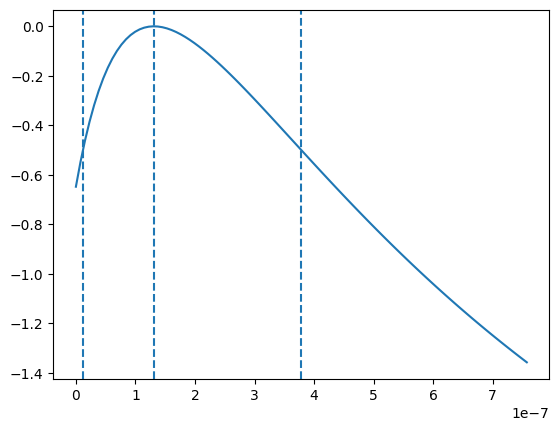

In [6]:
# K
def logL_model(a,central,upper,lower):
    sigp=upper-central
    sigm=central-lower
    sigma1=2*sigp*sigm/(sigp+sigm)
    sigma2=(sigp-sigm)/(sigp+sigm)
    return -0.5*(a-central)**2/(sigma1+(a-central)*sigma2)**2

x=np.linspace(0,gamma_K_upper*2,100)
plt.plot(x,logL_model(x,gamma_K_central,gamma_K_upper,gamma_K_lower))
plt.axvline(gamma_K_lower,linestyle='--',label='lower boundary')
plt.axvline(gamma_K_upper,linestyle='--',label='upper boundary')
plt.axvline(gamma_K_central,linestyle='--',label='central value')


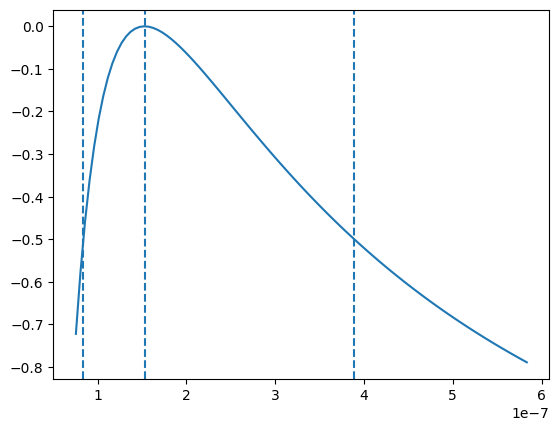

In [7]:
#gamma
x=np.linspace(gamma_tot_lower*0.9,gamma_tot_upper*1.5,100)
plt.plot(x,logL_model(x,gamma_tot_central,gamma_tot_upper,gamma_tot_lower))
plt.axvline(gamma_tot_lower,linestyle='--',label='lower boundary')
plt.axvline(gamma_tot_upper,linestyle='--',label='upper boundary')
plt.axvline(gamma_tot_central,linestyle='--',label='central value')

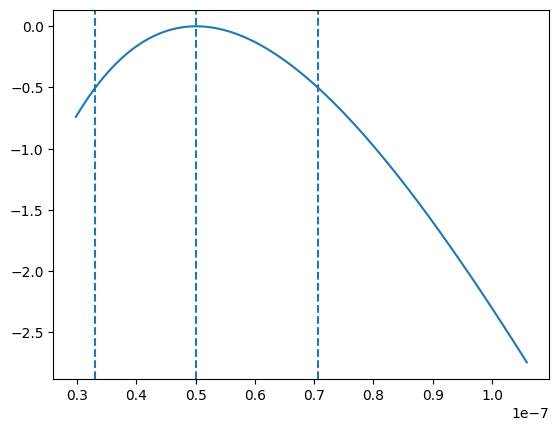

In [8]:
#pi
x=np.linspace(gamma_pi_lower*0.9,gamma_pi_upper*1.5,100)
plt.plot(x,logL_model(x,gamma_pi_central,gamma_pi_upper,gamma_pi_lower))
plt.axvline(gamma_pi_lower,linestyle='--',label='lower boundary')
plt.axvline(gamma_pi_upper,linestyle='--',label='upper boundary')
plt.axvline(gamma_pi_central,linestyle='--',label='central value')


# analysis with scipy

In [56]:
from scipy import optimize
def nll2(theta):
    ws=theta[0]
    wv=theta[1]
    gamma_tot=theta[2]
    br_pi,br_K=pi_K_brs_2GeV(ws,wv)
    gamma_pi=br_pi*gamma_tot
    gamma_K=br_K*gamma_tot
    return -logL_model(gamma_pi,gamma_pi_central,gamma_pi_upper,gamma_pi_lower)-logL_model(gamma_K,gamma_K_central,gamma_K_upper,gamma_K_lower)-logL_model(gamma_tot,gamma_tot_central,gamma_tot_upper,gamma_tot_lower)


res_nll2=optimize.minimize(nll2,(1,0.5,gamma_tot_central),bounds=[(0,10),(0,1),(0,gamma_tot_upper*2)],method='Nelder-Mead')
ws_min=res_nll2.x[0]
wv_min=res_nll2.x[1]
gamma_tot_min=res_nll2.x[2]
res_nll2

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.2745165541659939
             x: [ 7.265e-01  0.000e+00  2.320e-07]
           nit: 82
          nfev: 148
 final_simplex: (array([[ 7.265e-01,  0.000e+00,  2.320e-07],
                       [ 7.265e-01,  0.000e+00,  2.320e-07],
                       [ 7.264e-01,  0.000e+00,  2.320e-07],
                       [ 7.265e-01,  0.000e+00,  2.320e-07]]), array([ 2.745e-01,  2.745e-01,  2.745e-01,  2.745e-01]))

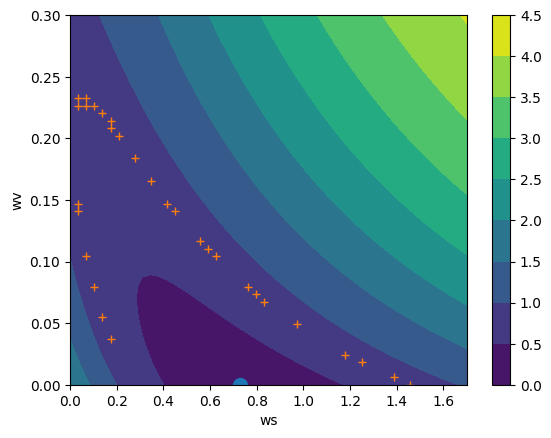

In [57]:
ws=np.linspace(0,1.7,50)
wv=np.linspace(0,0.3,50)
gamma_tot=np.linspace(0,gamma_tot_upper*2,50)
X,Y=np.meshgrid(ws,wv)
nll_const_gamma=np.vectorize(lambda x,y: nll2([x,y,res_nll2.x[2]]))(X,Y)
plt.contourf(X,Y,nll_const_gamma)
plt.colorbar()
plt.xlabel('ws')
plt.ylabel('wv')
plt.plot(res_nll2.x[0],res_nll2.x[1],'o',markersize=10)
mask=np.abs(nll_const_gamma-0.5-res_nll2.fun)<1e-2
plt.plot(X[mask],Y[mask],'+')

In [41]:
ws_contour=[]
wv_contour=[]
for phi in np.sort(np.concatenate((np.linspace(0,np.pi,40),np.linspace(np.pi/2,3*np.pi/4,40)))):
    aspect_ratio=0.1/1.2
    upper_bound=np.sqrt(ws_min**2+wv_min**2)
    root=optimize.root_scalar(lambda r: nll2([r*np.cos(phi)+ws_min,(r*np.sin(phi)+wv_min)*aspect_ratio,gamma_tot_min])-res_nll2.fun-0.5,x0=upper_bound)
    ws_contour.append(root.root*np.cos(phi)+ws_min)
    wv_contour.append((root.root*np.sin(phi)+wv_min)*aspect_ratio)

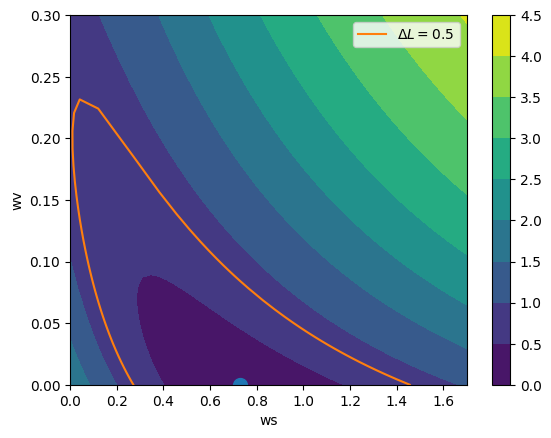

In [43]:
plt.contourf(X,Y,nll_const_gamma)
plt.colorbar()
plt.xlabel('ws')
plt.ylabel('wv')
plt.plot(ws_min,wv_min,'o',markersize=10)
plt.plot(ws_contour,wv_contour,label=r'$\Delta L=0.5$')
plt.legend()

In [57]:
SH_best_fit=ScalarHadronizer(2000,wv_min,1,1,ws_min,0,0)
SH_best_fit.print_initial_states()

The following initial states were generated:
eta eta: 0.16180943802871675
pi- pi+: 0.13766380585501442
K- K+: 0.1330864269920723
K~0 K0: 0.13274285752304754
eta eta'(958): 0.09990627186515921
eta eta(1295): 0.07298606751735447
pi0 pi0: 0.06887615493001095
pi0 pi(1300)0: 0.03935702209886491
eta eta(1405): 0.03776575659949988
eta'(958) eta'(958): 0.03574484385538873
f(0)(980) f(0)(980): 0.02971488971612801
a(0)(980)- a(0)(980)+: 0.027665537546622713
a(0)(980)0 a(0)(980)0: 0.013832768773311356
pi0 pi(1800)0: 0.008848158698808513


In [64]:
def pi_K_brs_vec(m_array,ws,wv):
    br_pi=[]
    br_K=[]
    for m in m_array:
        SH=ScalarHadronizer(m*1e3,wv,1,1,ws,1,0)
        pairs=SH.make_initialMesonPairs()
        br_pi.append(pairs[(-211,211)]+pairs[(111,111)])
        br_K.append(pairs[(-321,321)]+pairs[(-311,311)])
    return br_pi,br_K


m=np.linspace(2,3.6,10)
br_pi,br_K=pi_K_brs_vec(m,ws_min,wv_min)

In [25]:
import sys
import os

module_path = os.path.abspath(os.path.join('..', 'stogg'))
if module_path not in sys.path:
    sys.path.append(module_path)

from decay_to_gluons import gg_NLO,mqHIGLU

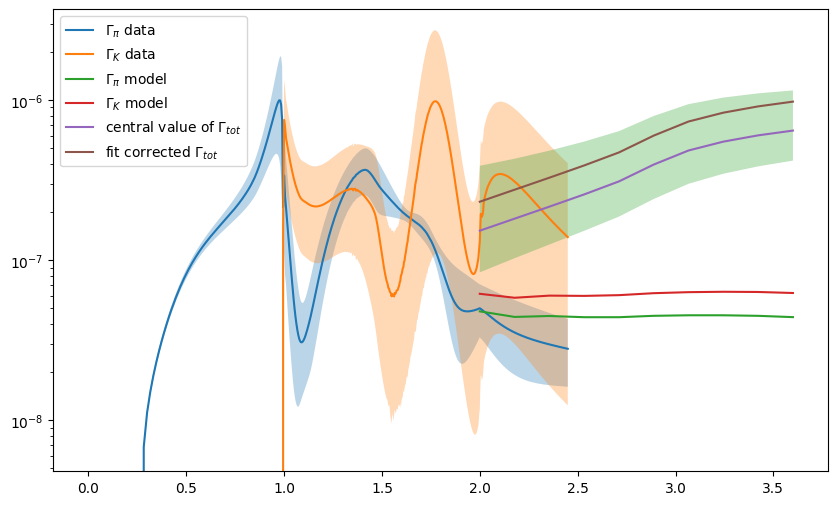

In [65]:
fig,ax=plt.subplots(figsize=(10,6))

gamma_tot=gamma_tot_min/gamma_tot_central*gg_NLO(m,m,mqHIGLU,fixed_NF=3)
ax.plot(pi_data[:,0],pi_data[:,1],label=r'$\Gamma_\pi$ data')
ax.fill_between(pi_data[:,0], pi_data[:,2],pi_data[:,3],alpha=0.3,interpolate=True)
ax.plot(K_data[:,0],K_data[:,1],label=r'$\Gamma_K$ data')
ax.fill_between(K_data[:,0], K_data[:,2],K_data[:,3],alpha=0.3,interpolate=True)
ax.plot(m,np.array(br_pi)*gamma_tot,label=r'$\Gamma_\pi$ model')
ax.plot(m,np.array(br_K)*gamma_tot,label=r'$\Gamma_K$ model')

ax.plot(m,gg_NLO(m,m,mqHIGLU,fixed_NF=3),label=r'central value of $\Gamma_{tot}$')
ax.fill_between(m, gg_NLO(m,m/2,mqHIGLU,fixed_NF=3),gg_NLO(m,m*2,mqHIGLU,fixed_NF=3),alpha=0.3,interpolate=True)
ax.plot(m,gamma_tot_min/gamma_tot_central*gg_NLO(m,m,mqHIGLU,fixed_NF=3),label=r'fit corrected $\Gamma_{tot}$')
ax.set_yscale('log')
ax.legend()

# analysis with iminuit

In [12]:
from iminuit import Minuit

def nll_minuit(ws,wv,gamma_fac):
    br_pi,br_K=pi_K_brs_2GeV(ws,wv)
    gamma_pi=br_pi*gamma_fac*gamma_tot_central
    gamma_K=br_K*gamma_fac*gamma_tot_central
    return -logL_model(gamma_pi,gamma_pi_central,gamma_pi_upper,gamma_pi_lower)-logL_model(gamma_K,gamma_K_central,gamma_K_upper,gamma_K_lower)-logL_model(gamma_fac,1,gamma_tot_upper/gamma_tot_central,gamma_tot_lower/gamma_tot_central)

m = Minuit(nll_minuit, ws=1,wv=0.5,gamma_fac=1)
m.limits=[(0,10),(0,1),(0,10)]
m.errordef = Minuit.LIKELIHOOD
m.migrad()
m.hesse()
m.minos()


NameError: name 'pi_K_brs_2GeV' is not defined

In [11]:
ws_opt=m.params[0].value
wv_opt=m.params[1].value
gamma_fac_opt=m.params[2].value
cov_matrix=np.array(m.covariance)

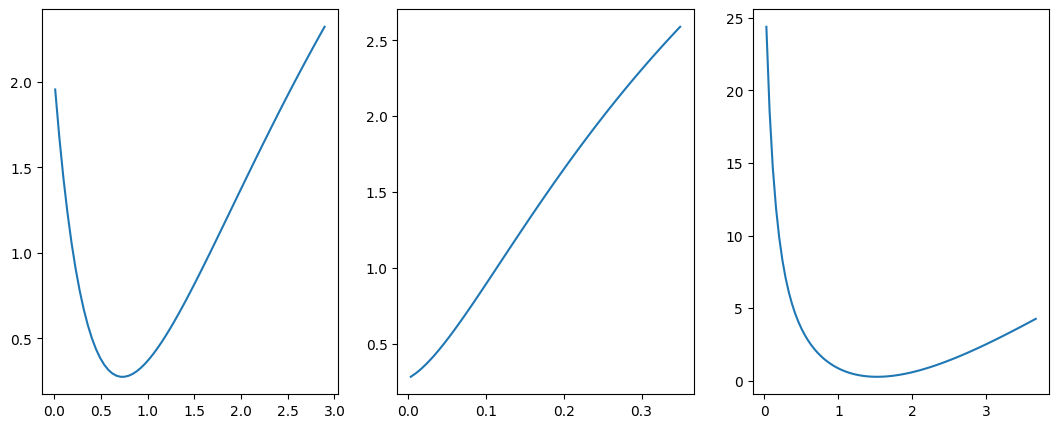

In [286]:
#likelihood profiles
fig,axis=plt.subplots(1,3,figsize=(13,5))
for i,a in enumerate(['ws','wv','gamma_fac']):
    x,y=m.profile(a)
    axis[i].plot(x[x>0],y[x>0])

In [45]:
x=m.mncontour('ws','wv')

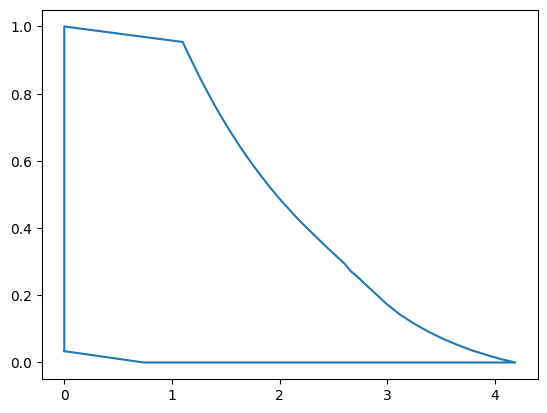

In [48]:
plt.plot(x[:,0],x[:,1])

0.19874804309879915


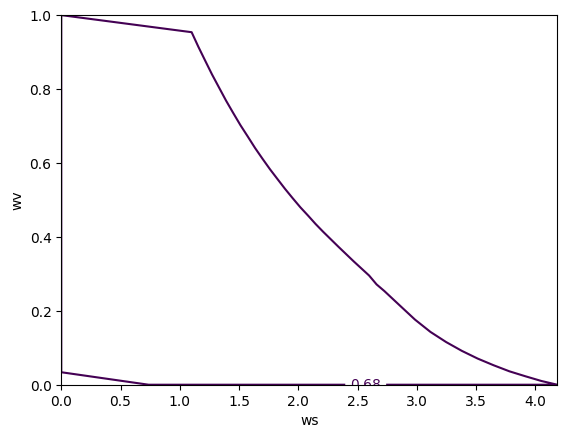

In [12]:
from scipy.stats import chi2
cl=chi2.cdf(1,3)
print(cl)
m.draw_mncontour('ws','wv',cl=0.68)

(array([-1.43282746, -1.34445069, -1.25607392, -1.16769715, -1.07932039,
        -0.99094362, -0.90256685, -0.81419008, -0.72581331, -0.63743654,
        -0.54905977, -0.460683  , -0.37230623, -0.28392946, -0.19555269,
        -0.10717592, -0.01879916,  0.06957761,  0.15795438,  0.24633115,
         0.33470792,  0.42308469,  0.51146146,  0.59983823,  0.688215  ,
         0.77659177,  0.86496854,  0.9533453 ,  1.04172207,  1.13009884,
         1.21847561,  1.30685238,  1.39522915,  1.48360592,  1.57198269,
         1.66035946,  1.74873623,  1.837113  ,  1.92548977,  2.01386653,
         2.1022433 ,  2.19062007,  2.27899684,  2.36737361,  2.45575038,
         2.54412715,  2.63250392,  2.72088069,  2.80925746,  2.89763423]),
 array([-0.35044029, -0.3361366 , -0.32183291, -0.30752922, -0.29322553,
        -0.27892184, -0.26461815, -0.25031447, -0.23601078, -0.22170709,
        -0.2074034 , -0.19309971, -0.17879602, -0.16449233, -0.15018864,
        -0.13588495, -0.12158126, -0.10727757, -0

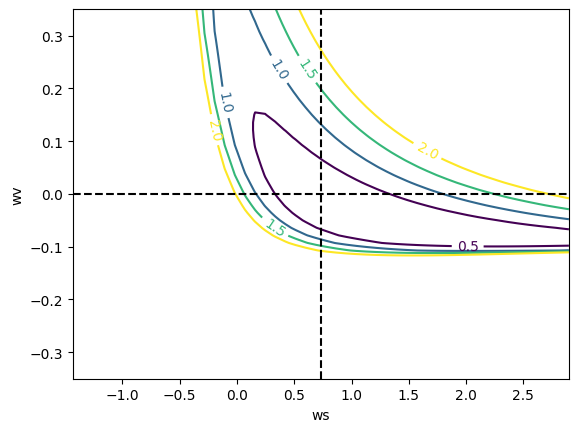

In [57]:
m.draw_contour('ws','wv')

(<Figure size 640x480 with 9 Axes>,
 array([[<Axes: >, <Axes: >, <Axes: >],
        [<Axes: ylabel='wv'>, <Axes: >, <Axes: >],
        [<Axes: xlabel='ws', ylabel='gamma_fac'>, <Axes: xlabel='wv'>,
         <Axes: xlabel='gamma_fac'>]], dtype=object))

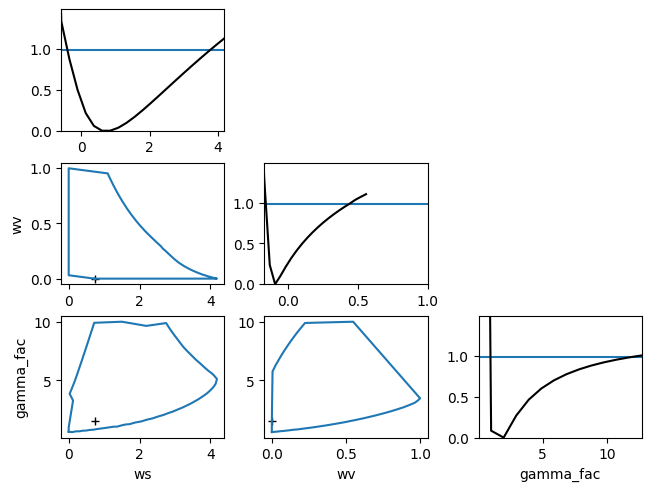

In [50]:
m.draw_mnmatrix()

In [68]:
chi2.cdf(1,3)

np.float64(0.19874804309879915)

# compute errors

In [13]:
import sys
import os

module_path = os.path.abspath(os.path.join('..', 'stogg'))
if module_path not in sys.path:
    sys.path.append(module_path)

from decay_to_gluons import gg_NLO,mqHIGLU,gamma_NLO_hadrons

In [ ]:
import networkx as nx

def sample_positive_multivariate_normal(mean, cov, size=1):
    samples = []
    while len(samples) < size:
        sample = np.random.multivariate_normal(mean, cov)
        if np.all(sample > 0):
            samples.append(sample)
    return np.array(samples)

def compute_errors(m):
    sampled_pars = sample_positive_multivariate_normal([ws_opt, wv_opt, gamma_fac_opt], cov_matrix, 100)
    SH_sampled = ScalarHadronizer(m, 1, 1, 1, 1, 1, 0)
    decay_graph_init, _ = SH_sampled.build_decay_graph(exclude_below_threshold=False)
    fs_keys = [s for s, d in decay_graph_init.out_degree() if d == 0]
    
    final_state_samples = {key: [[], []] for key in fs_keys}
    final_state_samples.update({'total': [], 'pi': [[], []], 'K': [[], []]})
    
    for ws_sample, wv_sample, gamma_sample in sampled_pars:
        SH_sampled.set_parameters(wv_sample, 1, 1, ws_sample, 1, 0)
        new_initial_states = SH_sampled.make_initialMesonPairs(exclude_below_threshold=False)
        reweighted_graph = SH_sampled.buildWeights(decay_graph_init, new_initial_states, fs_keys)
        attributes = nx.get_node_attributes(reweighted_graph, 'weight')
        gam = gamma_sample * gg_NLO(np.array([m * 1e-3]), np.array([m * 1e-3]), mqHIGLU, fixed_NF=3)[0]
        
        for key in fs_keys:
            final_state_samples[key][0].append(attributes[key])
            final_state_samples[key][1].append(attributes[key] * gam)
        
        final_state_samples['total'].append(gam)
        final_state_samples['pi'][0].append(attributes[(-211, 211)] + attributes[(111, 111)])
        final_state_samples['pi'][1].append(gam * (attributes[(-211, 211)] + attributes[(111, 111)]))
        final_state_samples['K'][0].append(attributes[(-321, 321)] + attributes[(-311, 311)])
        final_state_samples['K'][1].append(gam * (attributes[(-321, 321)] + attributes[(-311, 311)]))
    
    fs_mean_std = {s: {'BR mean': np.mean(v[0]), 'BR std': np.std(v[0]), 'gamma mean': np.mean(v[1]), 'gamma std': np.std(v[1])} for s, v in final_state_samples.items()}
    
    SH_sampled.set_parameters(wv_opt, 1, 1, ws_opt, 1, 0)
    new_initial_states = SH_sampled.make_initialMesonPairs(exclude_below_threshold=False)
    reweighted_graph = SH_sampled.buildWeights(decay_graph_init, new_initial_states, fs_keys)
    attributes = nx.get_node_attributes(reweighted_graph, 'weight')
    
    for key in fs_keys:
        fs_mean_std[key]['BR central'] = attributes[key]
    
    fs_mean_std['pi']['BR central'] = attributes[(-211, 211)] + attributes[(111, 111)]
    fs_mean_std['K']['BR central'] = attributes[(-321, 321)] + attributes[(-311, 311)]
    
    return fs_mean_std, decay_graph_init
#brs_with_errors,dg=compute_errors(2000)

{'BR mean': np.float64(0.324234534866126),
 'BR std': np.float64(0.07176151719737305),
 'gamma mean': np.float64(4.3781364715544036e-08),
 'gamma std': np.float64(3.380746921452628e-08),
 'BR central': np.float64(0.2668291652574102)}

In [327]:
#check if mean values are close to the central values
from math import isclose
SH=ScalarHadronizer(2000,wv_opt,1,1,ws_min,1,0)
decay_graph=SH.simulateDecay()
fs=SH.get_final_states(decay_graph)
print(len(fs))
for key in fs:
    if not isclose(fs[key],brs_with_errors[key]['BR mean'],rel_tol=0.3):
        print(fs[key],brs_with_errors[key]['BR mean'])


Generated 14 initial meson pairs.
109
0.0062140274038516765 0.01049992554113617
0.00310723470669268 0.005241675894225395
0.0069314251858691505 0.011684630738883772
0.0025744755633930446 0.004342955773555457
0.003589838414783385 0.006045056879150856
0.0005294910440815535 0.0010253606225258585
0.00028297440381116345 0.0005505513264952187
0.004601946151203435 0.008436455300755322
0.0010791653483032326 0.0022529670119279407
0.0030612098514438647 0.006390869409155583
0.0012856022624080019 0.0026839441168299057
0.0002525647724342341 0.0005272779575104823
0.001871212805653006 0.003906519728475165
0.001397276561272152 0.0029170858794121627
0.000356040371949232 0.0007433033447352501
0.000361129382162999 0.0007539276407738584
0.0001461033560202107 0.00030501909829021534
0.0010841614841750067 0.0022633974147609403
0.0021115813841295567 0.00440833576515865
0.00025373405378809624 0.0005297190591656234
0.0010052767984439206 0.002098710330452798
0.00024709423472388606 0.0005158571488102211
0.00032008

In [254]:
SH=ScalarHadronizer(2000,wv_opt,1,1,ws_min,1,0)
decay_graph=SH.simulateDecay()
SH.print_final_states(10,decay_graph)

Generated 14 initial meson pairs.
The following final states were generated:
(-211, 211) pi- pi+ :  0.13766380585501445
(-321, 321) K- K+ :  0.13308642699207232
(111, 111) pi0 pi0 :  0.06887615493001097
(-211, 130, 211) pi- K(L)0 pi+ :  0.04600305056226082
(22, 22, 111, 111, 111) gamma gamma pi0 pi0 pi0 :  0.042178456156019804
(111, 100111) pi0 pi(1300)0 :  0.039357022098864915
(130, 130) K(L)0 K(L)0 :  0.03318571438076189
(-211, 22, 22, 111, 211) pi- gamma gamma pi0 pi+ :  0.02944851375461745
(-211, -211, 211, 211) pi- pi- pi+ pi+ :  0.029150646681315184
(22, 22, 100221) gamma gamma eta(1295) :  0.028916370833573925


compute brs, and gammas with error. takes some time

In [21]:
m=np.linspace(2,5,10)
all_brs=[]
for mass in m*1e3:
    brs_with_errors,dg=compute_errors(mass)
    all_brs.append(brs_with_errors)


Generated 26 initial meson pairs.
DiGraph with 264 nodes and 418 edges
Generated 40 initial meson pairs.
DiGraph with 459 nodes and 821 edges
Generated 80 initial meson pairs.
DiGraph with 984 nodes and 2082 edges
Generated 150 initial meson pairs.
DiGraph with 1803 nodes and 4243 edges
Generated 213 initial meson pairs.
DiGraph with 2303 nodes and 5195 edges
Generated 283 initial meson pairs.
DiGraph with 2687 nodes and 5960 edges
Generated 323 initial meson pairs.
DiGraph with 3145 nodes and 6718 edges
Generated 348 initial meson pairs.
DiGraph with 4009 nodes and 8215 edges
Generated 366 initial meson pairs.
DiGraph with 4302 nodes and 8823 edges
Generated 407 initial meson pairs.
DiGraph with 25950 nodes and 72666 edges


In [341]:
import pickle
with open('brs_with_errors1.pkl','wb') as f:
    pickle.dump(all_brs,f)

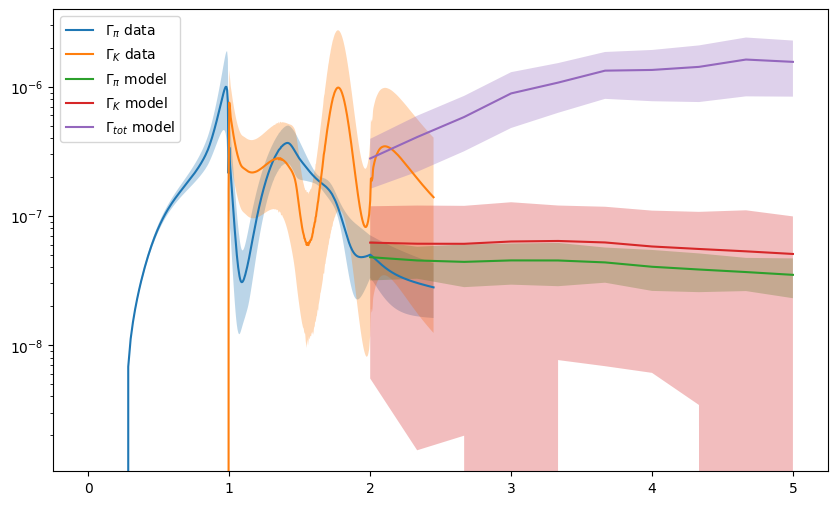

In [24]:
def plot_decay_widths(m,data):
    fig,ax=plt.subplots(figsize=(10,6))

    gamma_tot=gamma_fac_opt*gg_NLO(m,m,mqHIGLU,fixed_NF=3)

    ax.plot(pi_data[:,0],pi_data[:,1],label=r'$\Gamma_\pi$ data')
    ax.fill_between(pi_data[:,0], pi_data[:,2],pi_data[:,3],alpha=0.3,interpolate=True)
    ax.plot(K_data[:,0],K_data[:,1],label=r'$\Gamma_K$ data')
    ax.fill_between(K_data[:,0], K_data[:,2],K_data[:,3],alpha=0.3,interpolate=True)

    br_pi=np.array([d['pi']['BR central'] for d in data])
    gamma_pi=br_pi*gamma_tot
    br_K=np.array([d['K']['BR central'] for d in data])
    gamma_K=br_K*gamma_tot
    pi_err=np.array([d['pi']['gamma std'] for d in data])
    #gamma_K=np.array([d['gamma K']['mean'] for d in data])
    K_err=np.array([d['K']['gamma std'] for d in data])
    gamma_tot=np.array([d['total']['gamma mean'] for d in data])
    gamma_err=np.array([d['total']['gamma std'] for d in data])

    ax.plot(m,gamma_pi,label=r'$\Gamma_\pi$ model')
    ax.fill_between(m, gamma_pi-pi_err,gamma_pi+pi_err,alpha=0.3,interpolate=True)
    ax.plot(m,gamma_K,label=r'$\Gamma_K$ model')
    ax.fill_between(m, gamma_K-K_err,gamma_K+K_err,alpha=0.3,interpolate=True)
    ax.plot(m,gamma_tot,label=r'$\Gamma_{tot}$ model')
    ax.fill_between(m, gamma_tot-gamma_err,gamma_tot+gamma_err,alpha=0.3,interpolate=True)

    ax.set_yscale('log')
    ax.legend()

plot_decay_widths(m,all_brs)

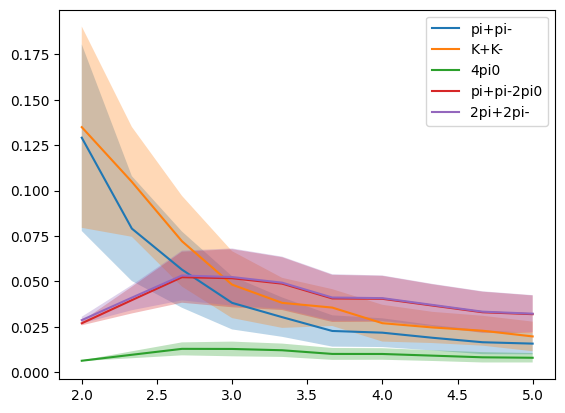

In [23]:
def plot_br_with_error(state,brs,m,label):
    error=np.array([brs[i][state]['BR std'] for i in range(len(m))])
    mean=np.array([brs[i][state]['BR mean'] for i in range(len(m))])
    central=np.array([brs[i][state]['BR central'] for i in range(len(m))])
    plt.plot(m,mean,label=label)
    #plt.plot(m,central,label='central value')
    plt.fill_between(m,mean+error,mean-error,alpha=0.3)
    plt.legend()

plot_br_with_error((-211,211),all_brs,m,label='pi+pi-')
plot_br_with_error((-321,321),all_brs,m,label='K+K-')
plot_br_with_error((111,111,111,111),all_brs,m,label='4pi0')
plot_br_with_error((-211,111,111,211),all_brs,m,label='pi+pi-2pi0')
plot_br_with_error((-211,-211,211,211),all_brs,m,label='2pi+2pi-')

In [28]:
SH=ScalarHadronizer(3000,wv_opt,1,1,ws_opt,1,0)
decay_graph=SH.simulateDecay()
SH.print_final_states(30,decay_graph)

Generated 37 initial meson pairs.
The following final states were generated:
(-211, -211, 211, 211) pi- pi- pi+ pi+ :  0.058493519552558895
(-211, 111, 111, 211) pi- pi0 pi0 pi+ :  0.05784250602572506
(-321, 321) K- K+ :  0.045766971265828904
(-211, 211) pi- pi+ :  0.0435315959420644
(100221, 100221) eta(1295) eta(1295) :  0.03350459663243381
(100221, 9020221) eta(1295) eta(1405) :  0.02873079536653955
(9020221, 9020221) eta(1405) eta(1405) :  0.022758437239231186
(-100211, 100211) pi(1300)- pi(1300)+ :  0.02181200214528891
(111, 111) pi0 pi0 :  0.021771950395815545
(22, 22, 100221) gamma gamma eta(1295) :  0.019995400997166526
(22, 22, 9020221) gamma gamma eta(1405) :  0.018973813167707597
(-211, -211, -211, 211, 211, 211) pi- pi- pi- pi+ pi+ pi+ :  0.018943653109499654
(100221, 100331) eta(1295) eta(1475) :  0.018577070551337956
(-211, -211, 111, 111, 211, 211) pi- pi- pi0 pi0 pi+ pi+ :  0.018131596462341165
(111, 100111) pi0 pi(1300)0 :  0.017690916782971643
(-211, 22, 22, 111, 111,

In [11]:
SH=ScalarHadronizer(2000,wv_opt,1,1,ws_opt,1,0)
SH.make_initialMesonPairs()

NameError: name 'wv_opt' is not defined

# supress only angular momentum

In [35]:
import scipy.optimize as optimize
SH2=ScalarHadronizer(2000,1,1,1,1,1,1,supression_mode='OAM')

def init_make_initialMesonPairs(self):
    mesons_below_threshold=p.findall(lambda p: p.mass<2000 and p.pdgid.is_meson==True)
    meson_pairs={}
    total_weight=0
    for i,m1 in enumerate(mesons_below_threshold):
        for m2 in mesons_below_threshold[i:]:
            if self.check_meson_combinations(m1,m2,self.scalar_mass):
                weight=self.initialWeight(m1,m2,1,1,1,1,1,1)
                if m1.pdgid<m2.pdgid: meson_pairs[(m1,m2)]=weight
                else: meson_pairs[(m2,m1)]=weight
                total_weight+=weight
    meson_pairs={k:v/total_weight for k,v in meson_pairs.items()}
    return meson_pairs

def update_init_weights(self,init_meson_pairs,strange_weight,OAM_supression_par):
    meson_pairs={}
    total_weight=0
    for m1,m2 in init_meson_pairs:
            weight=self.initialWeight(m1,m2,1,1,strange_weight,0,0,OAM_supression_par)
            if m1.pdgid<m2.pdgid: meson_pairs[(int(m1.pdgid),int(m2.pdgid))]=weight
            else: meson_pairs[(int(m2.pdgid),int(m1.pdgid))]=weight
            total_weight+=weight
    meson_pairs={k:v/total_weight for k,v in meson_pairs.items()}
    return meson_pairs

meson_pairs=init_make_initialMesonPairs(SH2)

def p_restframe(M,m1,m2):
    return np.sqrt((M**2-(m1+m2)**2)*(M**2-(m1-m2)**2))/2/M

K_p=p.findall('K+')[0]
K0=p.findall('K0')[0]
pi0=p.findall('pi0')[0]
pi_p=p.findall('pi+')[0]

def strange_weight(gamma_pi,gamma_K):
    return gamma_K*(p_restframe(2000,pi0.mass,pi0.mass)+2*p_restframe(2000,pi_p.mass,pi_p.mass))/(3*gamma_pi*(p_restframe(2000,K0.mass,K0.mass)+p_restframe(2000,K_p.mass,K_p.mass)))

def pi_K_brs_2GeV_oam(ws,wv):
    pairs=update_init_weights(SH2,meson_pairs,ws,wv)
    br_pi=pairs[(-211,211)]+pairs[(111,111)]
    br_K=pairs[(-321,321)]+pairs[(-311,311)]
    return br_pi,br_K


In [36]:
from iminuit import Minuit

def nll_minuit(ws,wv,gamma_fac):
    br_pi,br_K=pi_K_brs_2GeV_oam(ws,wv)
    gamma_pi=br_pi*gamma_fac*gamma_tot_central
    gamma_K=br_K*gamma_fac*gamma_tot_central
    return -logL_model(gamma_pi,gamma_pi_central,gamma_pi_upper,gamma_pi_lower)-logL_model(gamma_K,gamma_K_central,gamma_K_upper,gamma_K_lower)-logL_model(gamma_fac,1,gamma_tot_upper/gamma_tot_central,gamma_tot_lower/gamma_tot_central)

m_oam = Minuit(nll_minuit, ws=1,wv=0.5,gamma_fac=1)
m_oam.limits=[(0,10),(0,1),(0,10)]
m_oam.errordef = Minuit.LIKELIHOOD
m_oam.migrad()
m_oam.hesse()
m_oam.minos()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.7864                     │              Nfcn = 553              │
│ EDM = 1.46e-05 (Goal: 0.0001)    │            time = 7.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│     SOME parameters at limit     │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name      │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ ws        │   0.16    │   1.33    │   -0.16    │    1.98    │    0    │   10    │       │
│ 1 │ wv        │   10e-6   │ 720842e-6 │   -10e-6   │ 720243e-6  │    0    │    1    │       │
│ 2 │ gamma_fac │    1.9    │    2.3    │    -0.9    │    8.1     │    0    │   10    │       │
└───┴───────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          ws           │          wv           │       gamma_fac       │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.16   │   1.98    │  -10e-6   │ 720243e-6 │   -0.9    │    8.1    │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   True    │   False   │   True    │   False   │   False   │   True    │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌───────────┬───────────────────────────────┐
│           │        ws        wv gamma_fac │
├───────────┼───────────────────────────────┤
│        ws │     0.895 -0.012e-3       2.2 │
│        wv │ -0.012e-3  2.08e-05  0.018e-3 │
│ gamma_fac │       2.2  0.018e-3      6.05 │
└───────────┴───────────────────────────────┘

In [33]:
ws_opt_oam=m_oam.params[0].value
wv_opt_oam=m_oam.params[1].value
gamma_fac_opt_oam=m_oam.params[2].value
cov_matrix_oam=np.array(m_oam.covariance)

In [7]:
x=np.linspace(1,10,100)
k=np.sin(x)

what to do: 
 - decay rates to quarks, massless for strange, at NNLO
 - improve NNLO gluon result with higlu
 - compare two model by: $3,84=-2\log L(w_v=fixed)/L$, solve for w_v